In [ ]:
# Generating map files for our project.
# Let's have a general world geo file for our background.
# And let's grab US states.

In [1]:
import geopandas as gpd

In [2]:
gdf = gpd.read_file('../../data/GIS/world_lowquality.geo.json')

In [4]:
gdf.tail()

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
172,Admin-0 country,1,3,France,FR1,1,2,Dependency,1,New Caledonia,...,None,None,None,None,None,None,None,None,NCL.geojson,"POLYGON ((165.77999 -21.08, 166.59999 -21.7000..."
173,Admin-0 country,1,3,Solomon Islands,SLB,0,2,Sovereign country,1,Solomon Islands,...,None,None,None,None,None,None,None,None,SLB.geojson,"MULTIPOLYGON (((162.11902 -10.48272, 162.39865..."
174,Admin-0 country,1,4,Vanuatu,VUT,0,2,Sovereign country,1,Vanuatu,...,None,None,None,None,None,None,None,None,VUT.geojson,"MULTIPOLYGON (((167.2168 -15.89185, 167.84488 ..."
175,Admin-0 country,1,4,Antarctica,ATA,0,2,Indeterminate,1,Antarctica,...,None,None,None,None,None,None,None,None,ATA.geojson,"MULTIPOLYGON (((-48.66062 -78.04702, -48.1514 ..."
176,Admin-0 country,3,6,France,FR1,1,2,Dependency,1,French Southern and Antarctic Lands,...,None,None,None,None,None,None,None,None,ATF.geojson,"POLYGON ((68.935 -48.625, 69.58 -48.94, 70.525..."


In [8]:
geo_admin = gdf[['admin', 'geometry']]

In [11]:
geo_admin.tail()

,admin,geometry
172,New Caledonia,"POLYGON ((165.77999 -21.08, 166.59999 -21.7000..."
173,Solomon Islands,"MULTIPOLYGON (((162.11902 -10.48272, 162.39865..."
174,Vanuatu,"MULTIPOLYGON (((167.2168 -15.89185, 167.84488 ..."
175,Antarctica,"MULTIPOLYGON (((-48.66062 -78.04702, -48.1514 ..."
176,French Southern and Antarctic Lands,"POLYGON ((68.935 -48.625, 69.58 -48.94, 70.525..."


<Axes: >

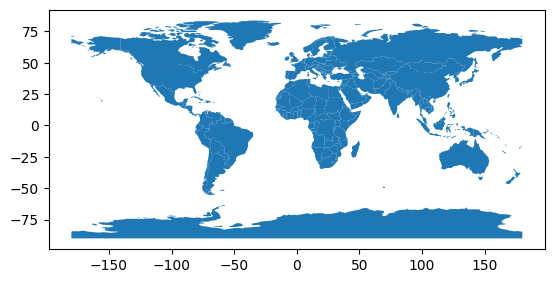

In [13]:
geo_admin.plot()

In [14]:
geo_admin.to_file('../../data/derived/world_polygons.geojson', driver='GeoJSON')

In [15]:
# And now let's check on the states data.

gdf = gpd.read_file('../../data/GIS/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [22]:
gdf.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,name_local,type,type_en,code_local,code_hasc,note,hasc_maybe,region,region_cod,provnum_ne,gadm_level,check_me,datarank,abbrev,postal,area_sqkm,sameascity,labelrank,name_len,mapcolor9,mapcolor13,fips,fips_alt,woe_id,woe_label,woe_name,latitude,longitude,sov_a3,adm0_a3,adm0_label,admin,geonunit,gu_a3,gn_id,gn_name,gns_id,gns_name,gn_level,gn_region,gn_a1_code,region_sub,sub_code,gns_level,gns_lang,gns_adm1,gns_region,min_label,max_label,min_zoom,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,name_he,name_uk,name_ur,name_fa,name_zht,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,None,State,State,US27,US.MN,None,None,Midwest,None,0,1,20,1,Minn.,MN,0,-99,0,9,1,1,US27,None,2347582,"Minnesota, US, United States",Minnesota,46.0592,-93.364,US1,USA,2,United States of America,United States of America,USA,5037779,Minnesota,-1,None,1,None,US.MN,West North Central,None,-1,None,None,None,3.5,7.5,2,Q1527,مينيسوتا,মিনেসোটা,Minnesota,Minnesota,Minnesota,Minnesota,Μινεσότα,मिनेसोटा,Minnesota,Minnesota,Minnesota,ミネソタ州,미네소타,Minnesota,Minnesota,Minnesota,Миннесота,Minnesota,Minnesota,Minnesota,明尼苏达州,1159315297,מינסוטה,Міннесота,مینیسوٹا,مینهسوتا,明尼蘇達州,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,None,State,State,US30,US.MT,None,None,West,None,0,1,20,1,Mont.,MT,0,-99,0,7,1,1,US30,None,2347585,"Montana, US, United States",Montana,46.9965,-110.044,US1,USA,2,United States of America,United States of America,USA,5667009,Montana,-1,None,1,None,US.MT,Mountain,None,-1,None,None,None,3.5,7.5,2,Q1212,مونتانا,মন্টানা,Montana,Montana,Montana,Montana,Μοντάνα,मोन्टाना,Montana,Montana,Montana,モンタナ州,몬태나,Montana,Montana,Montana,Монтана,Montana,Montana,Montana,蒙大拿州,1159315333,מונטנה,Монтана,مونٹانا,ایالت مونتانا,蒙大拿州,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,None,State,State,US38,US.ND,None,None,Midwest,None,0,1,20,1,N.D.,ND,0,-99,0,12,1,1,US38,None,2347593,"North Dakota, US, United States",North Dakota,47.4675,-100.302,US1,USA,2,United States of America,United States of America,USA,5690763,North Dakota,-1,None,1,None,US.ND,West North Central,None,-1,None,None,None,3.5,7.5,2,Q1207,داكوتا الشمالية,নর্থ ডাকোটা,North Dakota,North Dakota,Dakota del Norte,Dakota du Nord,Βόρεια Ντακότα,उत्तर डेकोटा,Észak-Dakota,Dakota Utara,Dakota del Nord,ノースダコタ州,노스다코타,Noord-Dakota,Dakota Północna,Dakota do Norte,Северная Дакота,North Dakota,Kuzey Dakota,Bắc Dakota,北达科他州,1159315337,דקוטה הצפונית,Північна Дакота,شمالی ڈکوٹا,داکوتای شمالی,北達科他州,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,None,State,State,US15,US.HI,None,None,West,None,0,1,20,1,Hawaii,HI,0,

In [23]:
output = gdf[['name', 'postal', 'geometry']]

<Axes: >

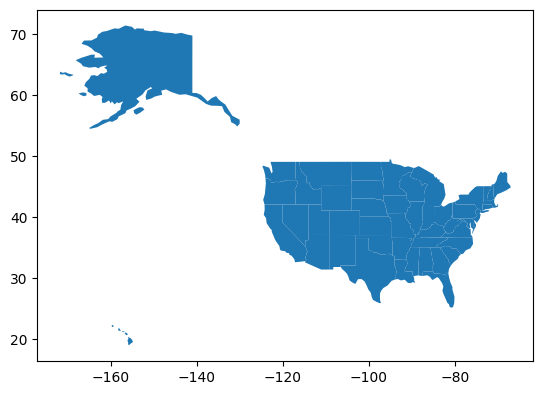

In [24]:
output.plot()

In [25]:
output.to_file('../../data/derived/us_state_polygons.geojson', driver='GeoJSON')

In [ ]:
# Now, we'll need to get data on cities
# Let's collect city name, location, and the population in these cities.
# Then we can calculate the fraction of total population associated with the city
# Then use that to scale each city's energy blobs for our map.


In [27]:
cities = gpd.read_file('../../data/GIS/USA_Major_Cities__2020.geojson')

In [28]:
cities.head()

,OBJECTID,NAME,CLASS,STATE_ABBR,STATE_FIPS,PLACE_FIPS,POPULATION,POP_CLASS,POP_SQMI,SQMI,CAPITAL,geometry
0,1,Alabaster,city,AL,01,0100820,33284,6,1300.7,25.59,,POINT (-86.81782 33.2445)
1,2,Albertville,city,AL,01,0100988,22386,6,827.9,27.04,,POINT (-86.21205 34.26421)
2,3,Alexander City,city,AL,01,0101132,14843,6,337.4,43.99,,POINT (-85.95631 32.94309)
3,4,Anniston,city,AL,01,0101852,21564,6,469.9,45.89,,POINT (-85.81986 33.6565)
4,5,Athens,city,AL,01,0102956,25406,6,625.8,40.60,,POINT (-86.9508 34.78484)


In [ ]:
cities[['STATE_ABBR', 'POPULATION', 'NAME', 'geometry']].head()

,STATE_ABBR,POPULATION,NAME,geometry
0,AL,33284,Alabaster,POINT (-86.81782 33.2445)
1,AL,22386,Albertville,POINT (-86.21205 34.26421)
2,AL,14843,Alexander City,POINT (-85.95631 32.94309)
3,AL,21564,Anniston,POINT (-85.81986 33.6565)
4,AL,25406,Athens,POINT (-86.9508 34.78484)


In [ ]:
# get the aggregated state population (from cities)

states_pop = cities[['STATE_ABBR', 'POPULATION']].groupby('STATE_ABBR').sum('POPULATION')

In [35]:
states_pop.head()

,POPULATION
STATE_ABBR,
AK,405677
AL,2426328
AR,1440193
AZ,6177381
CA,35347292


In [37]:
states_pop.rename(columns={'POPULATION': 'state_population'}, inplace=True)

In [39]:
gdf = cities.merge(states_pop, how='left', on='STATE_ABBR')

In [40]:
gdf.head()

,OBJECTID,NAME,CLASS,STATE_ABBR,STATE_FIPS,PLACE_FIPS,POPULATION,POP_CLASS,POP_SQMI,SQMI,CAPITAL,geometry,state_population
0,1,Alabaster,city,AL,01,0100820,33284,6,1300.7,25.59,,POINT (-86.81782 33.2445),2426328
1,2,Albertville,city,AL,01,0100988,22386,6,827.9,27.04,,POINT (-86.21205 34.26421),2426328
2,3,Alexander City,city,AL,01,0101132,14843,6,337.4,43.99,,POINT (-85.95631 32.94309),2426328
3,4,Anniston,city,AL,01,0101852,21564,6,469.9,45.89,,POINT (-85.81986 33.6565),2426328
4,5,Athens,city,AL,01,0102956,25406,6,625.8,40.60,,POINT (-86.9508 34.78484),2426328


In [41]:
# gdf = gdf[['STATE_ABBR', 'POPULATION', 'NAME', 'geometry']]

gdf['population_fraction'] = gdf['POPULATION']/gdf['state_population']

In [43]:
gdf.head(2)

,OBJECTID,NAME,CLASS,STATE_ABBR,STATE_FIPS,PLACE_FIPS,POPULATION,POP_CLASS,POP_SQMI,SQMI,CAPITAL,geometry,state_population,population_fraction
0,1,Alabaster,city,AL,01,0100820,33284,6,1300.7,25.59,,POINT (-86.81782 33.2445),2426328,0.013718
1,2,Albertville,city,AL,01,0100988,22386,6,827.9,27.04,,POINT (-86.21205 34.26421),2426328,0.009226


In [48]:
# clean up a lil
gdf_clean = gdf[['STATE_ABBR', 'NAME', 'population_fraction', 'geometry']].copy()

In [49]:
gdf_clean.rename(columns={'STATE_ABBR': 'state', 'NAME': 'name',
                          'population_fraction': 'population_fraction_in_state'},
                          inplace=True)

In [50]:
gdf_clean.head()

,state,name,population_fraction_in_state,geometry
0,AL,Alabaster,0.013718,POINT (-86.81782 33.2445)
1,AL,Albertville,0.009226,POINT (-86.21205 34.26421)
2,AL,Alexander City,0.006117,POINT (-85.95631 32.94309)
3,AL,Anniston,0.008888,POINT (-85.81986 33.6565)
4,AL,Athens,0.010471,POINT (-86.9508 34.78484)


In [52]:
gdf_clean.to_file('../../data/derived/us_cities_population_fraction.geojson', driver='GeoJSON')